# E-Commerce Data Set
### An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

#### The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

•	ID: ID Number of Customers.
•	Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

•	Mode of shipment: The Company Ships the products in multiple way such as Ship, Flight and Road.

•	Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

•	Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

•	Cost of the product: Cost of the Product in US Dollars.

•	Prior purchases: The Number of Prior Purchase.

•	Product importance: The company has categorized the product in the various parameter such as low, medium, high.

•	Gender: Male and Female.

•	Discount offered: Discount offered on that specific product.

•	Weight in grams: It is the weight in grams.

•	Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time


# First import the libraries

In [65]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression #Logistic Regression is a Machine Learning classification algorithm
from sklearn.linear_model import LinearRegression #Linear Regression is a Machine Learning classification algorithm
from sklearn.model_selection import train_test_split #Splitting of Dataset
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# Load  the dataset

In [2]:
df=pd.read_csv("D:\E-Commerce Data Set-Capston Project\Train.csv")

# Display first 5 rows of the dataset 

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


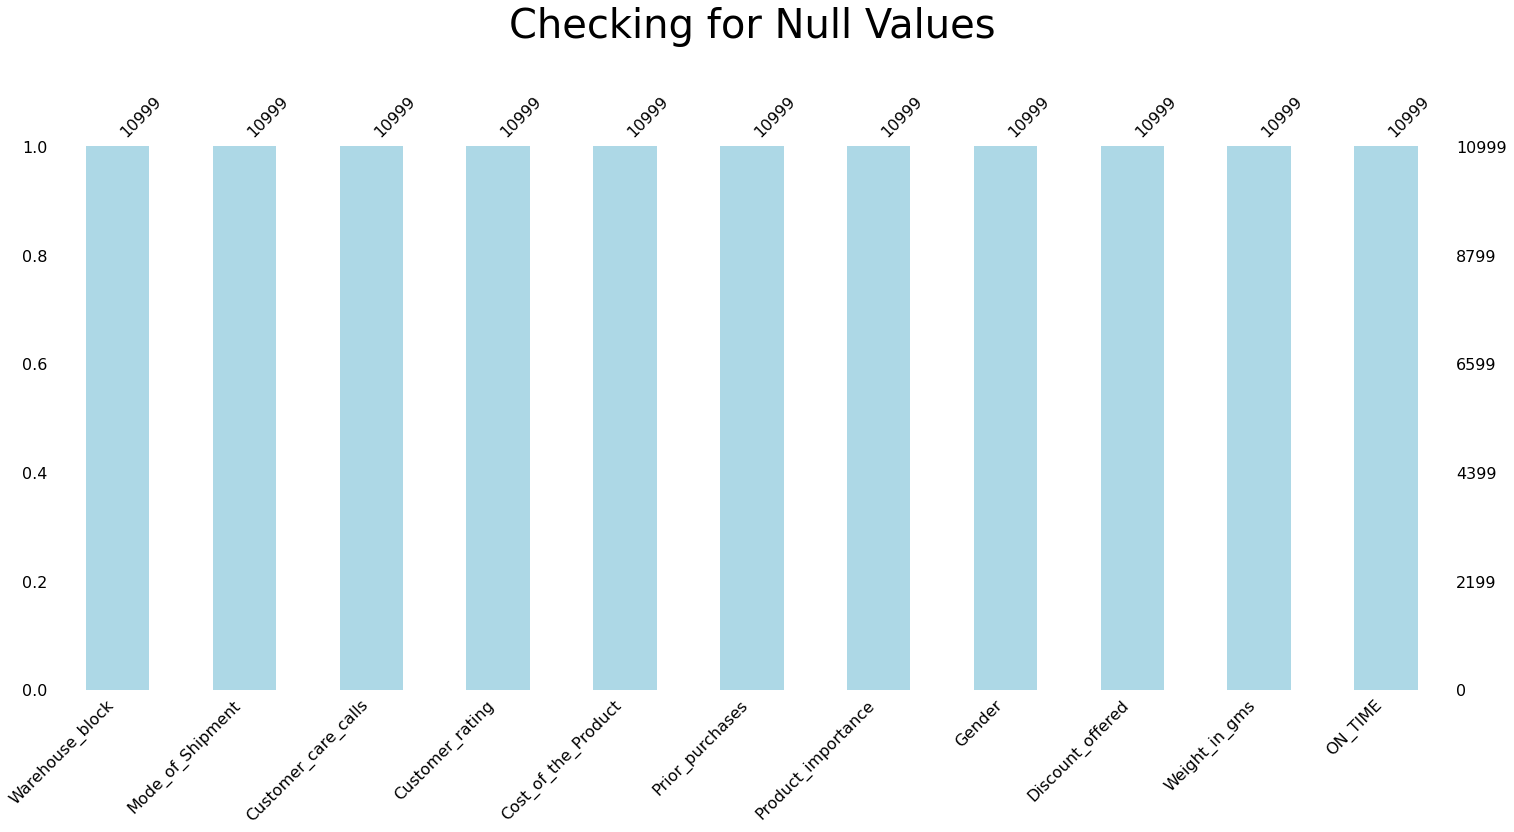

In [66]:
import missingno as msno
msno.bar(df, color = 'lightblue')
plt.title('Checking for Null Values\n', fontsize = 40)
plt.show()


### There is no missing values present in the dataset.

# Display last 5 rows of the dataset

In [5]:
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


# Display variable name and their datatypes

In [6]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

# Count non-Null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


# Descriptive Statistics

#### here we get info about data ( counts,mean,std,min, max,percentile)

In [8]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


# correlation 

In [9]:
df.corr()['Reached.on.Time_Y.N']

ID                    -0.411822
Customer_care_calls   -0.067126
Customer_rating        0.013119
Cost_of_the_Product   -0.073587
Prior_purchases       -0.055515
Discount_offered       0.397108
Weight_in_gms         -0.268793
Reached.on.Time_Y.N    1.000000
Name: Reached.on.Time_Y.N, dtype: float64

# Handling Duplicate

In [10]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10994    False
10995    False
10996    False
10997    False
10998    False
Length: 10999, dtype: bool

#### No duplicate value present in the dataset

# Rename Column names

In [11]:
df.rename(columns ={'Reached.on.Time_Y.N':'ON_TIME'},inplace=True) #rename column name

# Detect Outliers

In [12]:
P0=df.Cost_of_the_Product.min()
P100=df.Cost_of_the_Product.max()
q1=df.Cost_of_the_Product.quantile(.25)
q2=df.Cost_of_the_Product.quantile(.5)
q3=df.Cost_of_the_Product.quantile(.75)
IQR=q3-q1
LC=q1-1.5*IQR
UC=q3+1.5*IQR

In [13]:
print('P0=',P0,'P100=',P100,'q1=',q1,'q2=',q2,'q3=',q3,'IQR=',IQR,'LC=',LC,'UC=',UC)

P0= 96 P100= 310 q1= 169.0 q2= 214.0 q3= 251.0 IQR= 82.0 LC= 46.0 UC= 374.0


In [14]:
if LC<P0:
    print('No outlier on lower side')
else:
    print("outlier on lower side")
if UC>P100:
    print('No outliers on Higher side')
else:
    print("outliers on Higher side")

No outlier on lower side
No outliers on Higher side


#### No outliers present on higher side and lower side in cost column

# Drop unwanted columns

In [15]:
df.drop('ID', axis = 1, inplace = True) # drop id column from the dataset

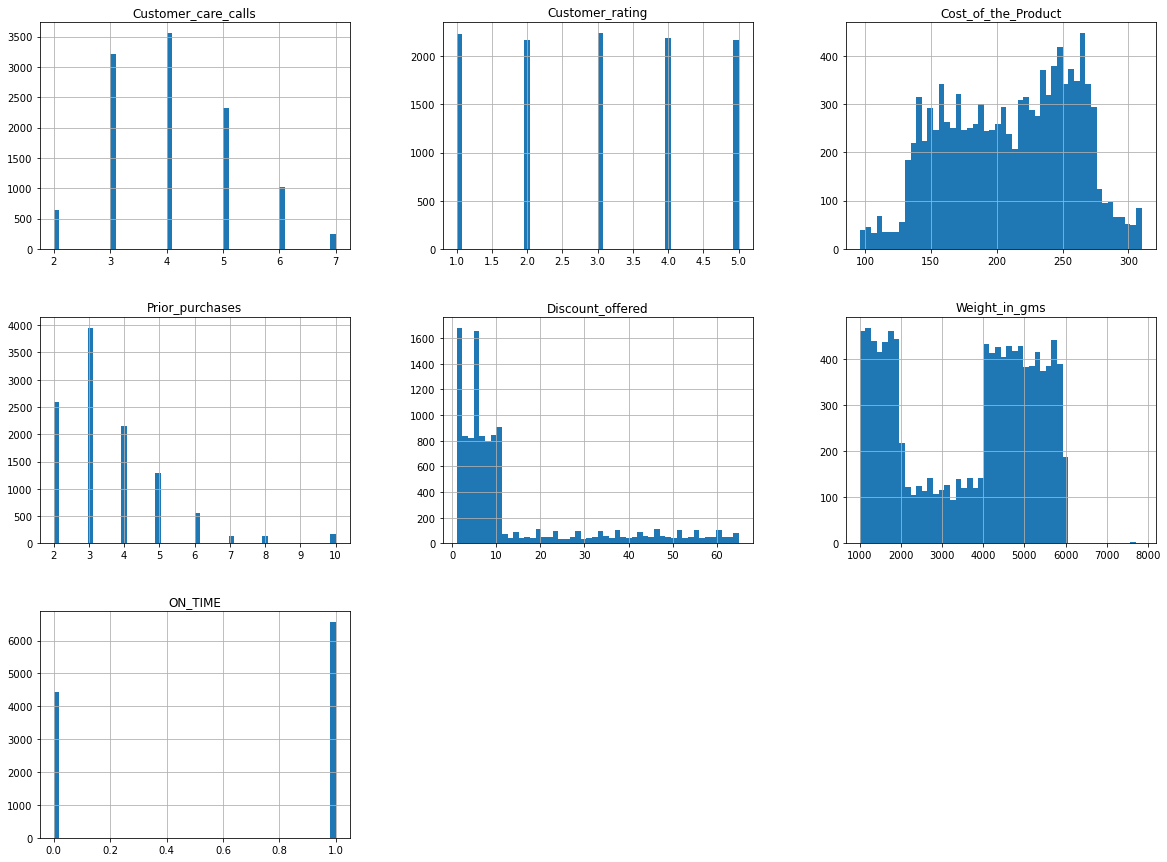

In [67]:
# Plot a histogram for each numerical attribute
df.hist(bins=50, figsize=(20,15))
plt.show()

# Univariate Analysis

## Cost Column

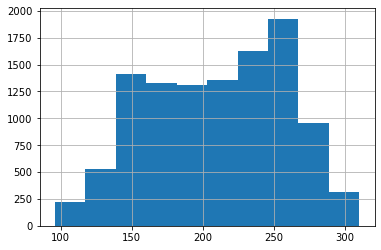

In [68]:
df.Cost_of_the_Product.hist()
plt.show()

### Most of the product cost lies between 140 to 280 and all cost lies between aprox 80 to 320

# Customer_care_calls column

<function matplotlib.pyplot.show(close=None, block=None)>

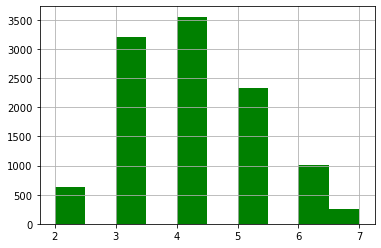

In [69]:
df.Customer_care_calls.hist(color='g')
plt.show

Text(0.5, 0, 'Customer_care_calls')

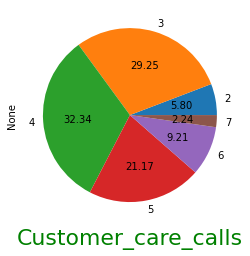

In [70]:
df.groupby("Customer_care_calls").size().plot(kind='pie', autopct='%.2f').set_xlabel("Customer_care_calls", size=22,color='g')

#### 3500+ customer made 4 calls . Most of the customer have 3,4,5 calls.

# Warehouse_block column

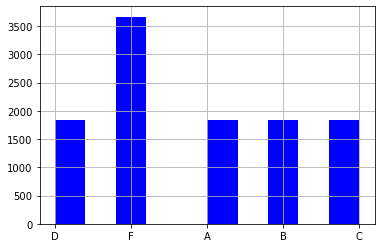

In [71]:
df.Warehouse_block.hist(color='b')
plt.show()

Text(0.5, 0, 'Warehouse_block')

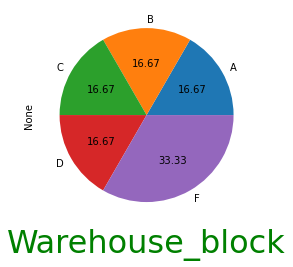

In [72]:
df.groupby("Warehouse_block").size().plot(kind='pie', autopct='%.2f').set_xlabel('Warehouse_block', size=32,color='g')

#### More than 3500 product are dispatched from F warehouse block. Aprox. 1800 product dispatched from each block(A, B, C, D) .This graph shows that F block dispached almost double products as compare to other warehouse block.

# Deliver on time column

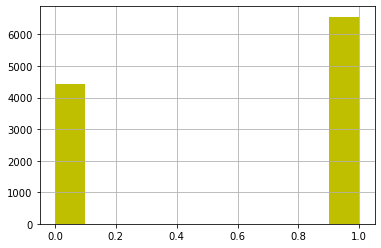

In [73]:
df.ON_TIME.hist(color='y')
plt.show()

Text(0.5, 0, 'ON_TIME')

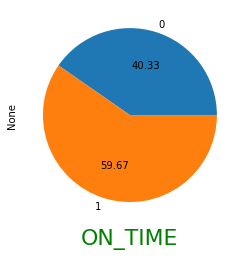

In [74]:
df.groupby("ON_TIME").size().plot(kind='pie', autopct='%.2f').set_xlabel('ON_TIME', size=22,color='g')

#### This visualization shows that almost 59.67% of products was delivered on time and 40.33% was late delivered. 

# Discount Offered

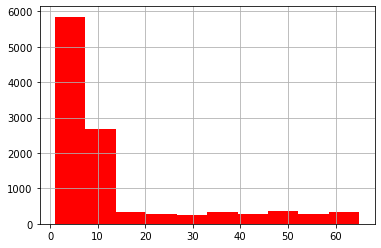

In [75]:
df.Discount_offered .hist(color='r')
plt.show()

#### Almost 1% to 12% discount offered on 8000+ of product out of 10999 products and 13 to 66 percent discount offered on very less ammount of products. 

# Customer_rating column

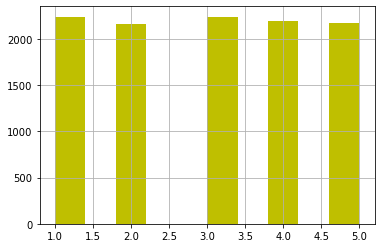

In [76]:
df.Customer_rating .hist(color='y')
plt.show()

Text(0.5, 0, 'Customer_rating')

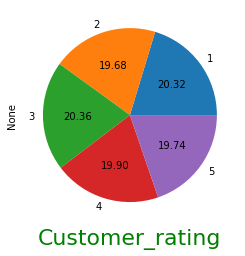

In [77]:
df.groupby("Customer_rating").size().plot(kind='pie', autopct='%.2f').set_xlabel("Customer_rating", size=22,color='g')

####  20.32% customer give rating - 1.0
####  19.68% customer give rating - 2.0
####  20.36% customer give rating - 3.0
####  19.90% customer give rating - 4.0
####  19.74% customer give rating - 5.0

# Product_importance Column

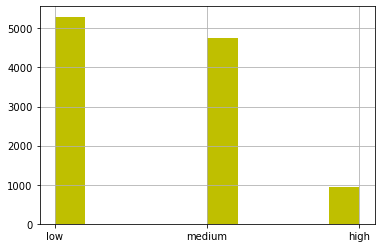

In [78]:
df.Product_importance.hist(color='y')
plt.show()

Text(0.5, 0, 'Product_importance')

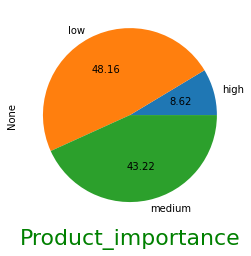

In [79]:
df.groupby("Product_importance").size().plot(kind='pie', autopct='%.2f').set_xlabel("Product_importance", size=22,color='g')

#### 48.16% Product have LOW product importance
#### 43.22% Product have MEDIUM product importance
#### 8.62% Product have HIGH product importance

# Gender column

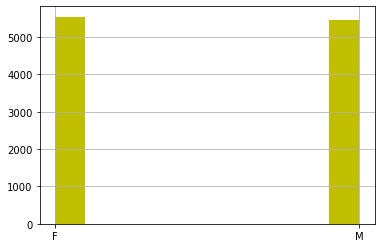

In [80]:
df.Gender.hist(color='y')
plt.show()


Text(0.5, 0, 'Gender')

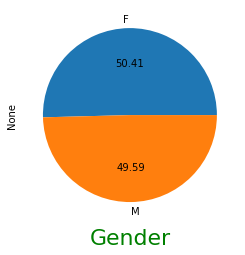

In [81]:
df.groupby("Gender").size().plot(kind='pie', autopct='%.2f').set_xlabel("Gender", size=22,color='g')

#### 50.41% product ordered by female customers and 49.59% product ordered by male customers

# Mode of Shipment

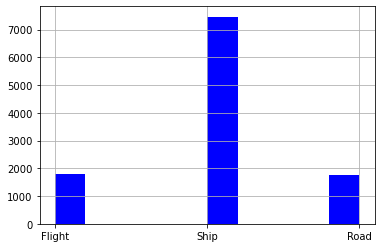

In [82]:
df.Mode_of_Shipment.hist(color='b')
plt.show()

Text(0.5, 0, 'Mode_of_Shipment')

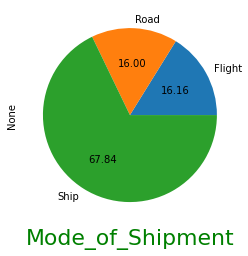

In [83]:
df.groupby("Mode_of_Shipment").size().plot(kind='pie', autopct='%.2f').set_xlabel('Mode_of_Shipment', size=22,color='g')

#### 16% by Road , 16.16% by Flight , and 67.84 by Ship so most of the product are delivered by ship.

# Prior Purchase

<AxesSubplot:xlabel='Prior_purchases', ylabel='count'>

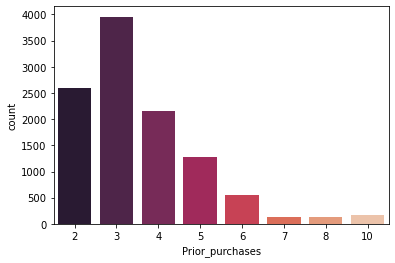

In [84]:
 sns.countplot(x ='Prior_purchases' , data = df, palette='rocket')

Text(0.5, 0, 'Prior_purchases')

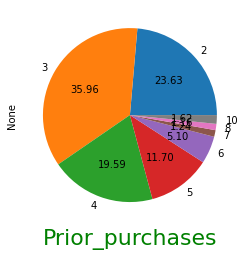

In [85]:
df.groupby("Prior_purchases").size().plot(kind='pie', autopct='%.2f').set_xlabel('Prior_purchases', size=22,color='g')

#### 36% customer purchase product 3 time before
#### 19.5% cusomer purchase product 4 time before
#### 23.6%cstomer purchase product 2time before

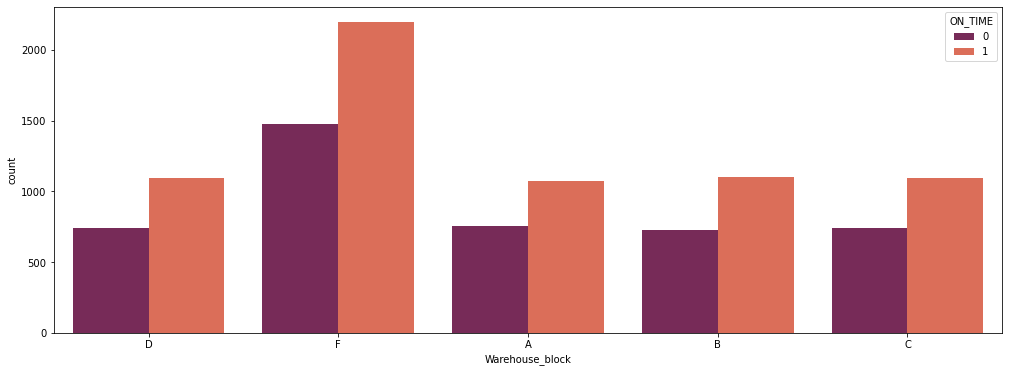

In [86]:
plt.figure(figsize = (17, 6))
sns.countplot('Warehouse_block', hue = 'ON_TIME', data = df, palette='rocket')
plt.show()

#### From each warehouse block almost 40% product was delivered on time.

In [88]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Q1.What was Customer Rating? And was the product delivered on time?

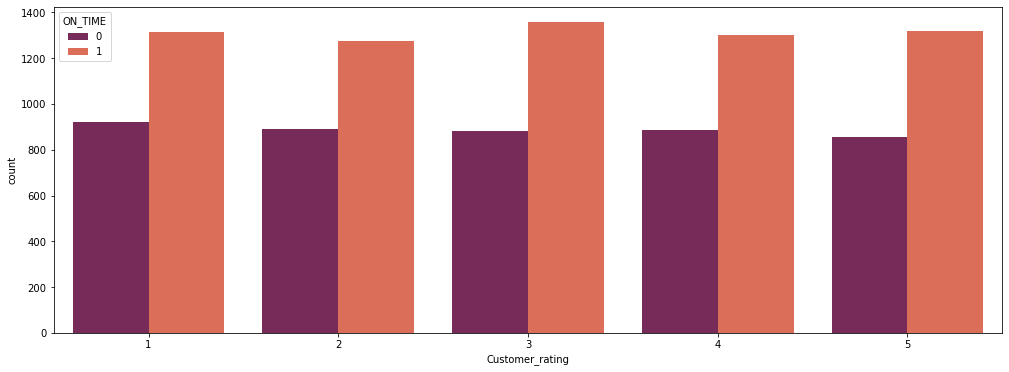

In [89]:
plt.figure(figsize = (17, 6))
sns.countplot('Customer_rating', hue = 'ON_TIME', data = df, palette='rocket')
plt.show()

# Ans. Customer rating is not affected by the product delivered on time. For each category of customer rating aprox. 60% product delivered on time and 40% is not delivered on time.

#  Q2. Is Customer query is being answered?

<AxesSubplot:xlabel='Customer_care_calls', ylabel='count'>

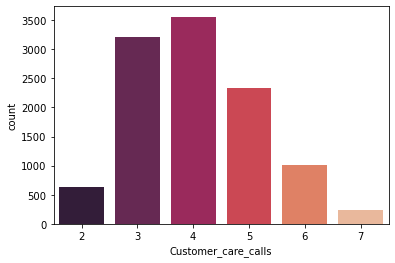

In [90]:
 sns.countplot(x ='Customer_care_calls' , data = df, palette='rocket')

# Ans. Yes Customer query is answered . Most of the product have customer care calls more than 3.

# Q3.If Product importance is high. having highest rating or being delivered on time?

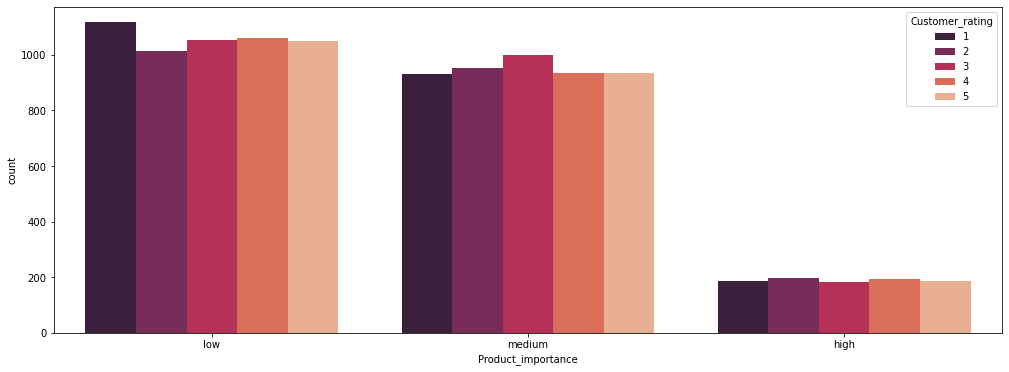

In [91]:
plt.figure(figsize = (17, 6))
sns.countplot('Product_importance', hue = 'Customer_rating', data = df, palette='rocket')
plt.show()

# Ans. No equal rating for each category of product importance. High product importance product have similar rating as Low and Medium. There is no effect on customer rating according to product importance.

In [40]:
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ON_TIME
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


In [41]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'ON_TIME'],
      dtype='object')

# Encoding categorical variable to numerical variable

In [42]:
def Encode(df):
    for column in df.columns[~df.columns.isin([ 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_KG',
       'ON_TIME'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())

In [43]:
df_en

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ON_TIME
0,0,0,4,2,177,3,0,0,44,0,1
1,1,0,4,5,216,2,0,1,59,1,1
2,2,0,2,2,183,4,0,1,48,2,1
3,3,0,3,3,176,4,1,1,10,3,1
4,4,0,2,2,184,3,1,0,46,4,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,2,1,4,1,252,5,1,0,1,1065,1
10995,3,1,4,1,232,5,1,0,6,595,0
10996,4,1,5,4,242,5,0,0,4,1093,0
10997,1,1,5,2,223,6,1,1,2,938,0


<AxesSubplot:>

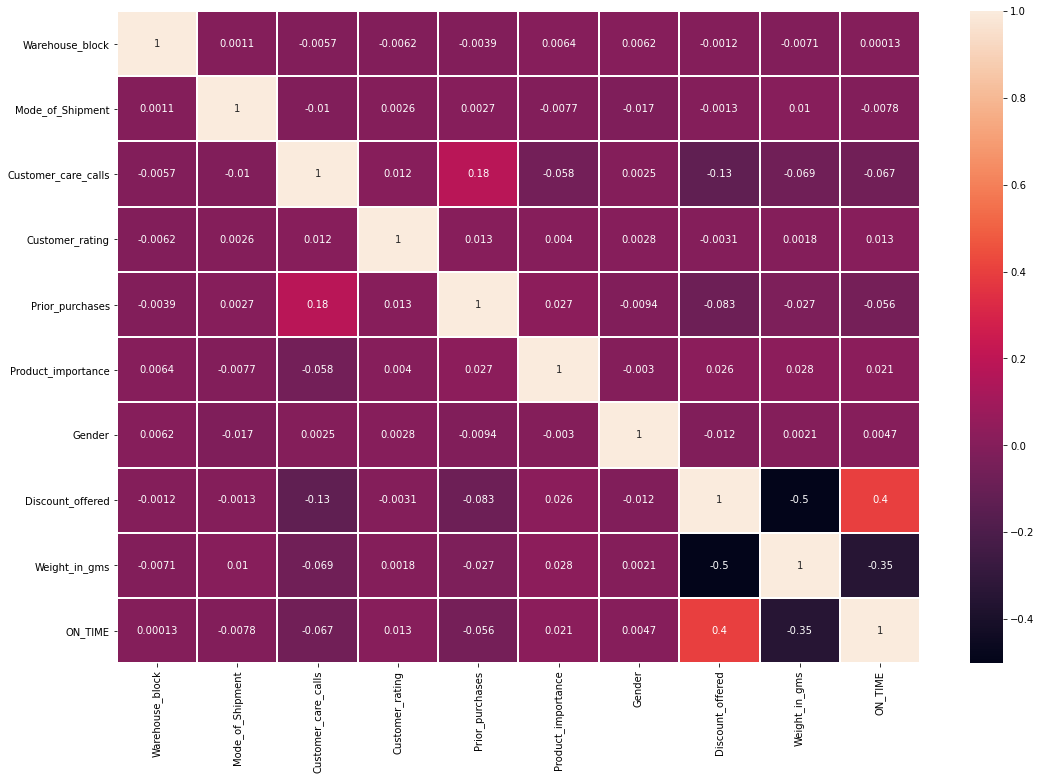

In [92]:
plt.figure(figsize=(18, 12))
sns.heatmap(df_en.corr(), annot=True, linewidth=1)

## In the above heatmap weight in gm shows very high negative correlation with the result variable so i have to drop this column from the dataset.

In [45]:

df_en=df_en.drop('Cost_of_the_Product', axis=1)

In [46]:
df_en

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ON_TIME
0,0,0,4,2,3,0,0,44,0,1
1,1,0,4,5,2,0,1,59,1,1
2,2,0,2,2,4,0,1,48,2,1
3,3,0,3,3,4,1,1,10,3,1
4,4,0,2,2,3,1,0,46,4,1
...,...,...,...,...,...,...,...,...,...,...
10994,2,1,4,1,5,1,0,1,1065,1
10995,3,1,4,1,5,1,0,6,595,0
10996,4,1,5,4,5,0,0,4,1093,0
10997,1,1,5,2,6,1,1,2,938,0


# Train Test Split

In [47]:
x = df_en[['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered']]
y = df_en['ON_TIME']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1)
x_train.shape, y_train.shape

((9899, 8), (9899,))

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler= StandardScaler()

In [50]:
x_train = scaler.fit_transform(x_train)

In [51]:
x_train

array([[ 1.61207128,  0.00465025, -0.05325768, ..., -0.93992605,
         1.0082164 , -0.45416197],
       [-1.36751021,  0.00465025, -0.92754924, ...,  0.61989423,
         1.0082164 , -0.39210884],
       [ 0.12228053,  1.77514358, -0.92754924, ..., -0.93992605,
         1.0082164 , -0.26800258],
       ...,
       [ 1.61207128,  0.00465025, -0.92754924, ...,  2.17971451,
         1.0082164 , -0.70237449],
       [-0.62261484,  1.77514358, -0.92754924, ..., -0.93992605,
        -0.99185056, -0.39210884],
       [ 0.12228053,  0.00465025, -0.92754924, ..., -0.93992605,
        -0.99185056, -0.64032136]])

In [52]:
x_test=scaler.fit_transform(x_test)

In [53]:
x_test

array([[-0.59707344, -1.71774144, -0.89085555, ..., -0.9667324 ,
        -0.99095004, -0.52184267],
       [-0.59707344, -0.01394019, -1.7849624 , ...,  0.58568459,
        -0.99095004, -0.46295603],
       [ 0.1408825 ,  1.68986105, -0.89085555, ..., -0.9667324 ,
        -0.99095004, -0.75738921],
       ...,
       [ 0.87883843, -0.01394019, -0.89085555, ..., -0.9667324 ,
        -0.99095004,  1.8336228 ],
       [-1.33502938,  1.68986105,  0.0032513 , ...,  2.13810158,
        -0.99095004, -0.75738921],
       [-1.33502938,  1.68986105, -0.89085555, ..., -0.9667324 ,
        -0.99095004, -0.22740948]])

In [54]:
#Prepare a Linear REgression Model
L=LinearRegression()
L.fit(x_train,y_train)
y_pred=L.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
accuracy_score(y_test,y_pred.round(),normalize=False)/10

65.8

In [55]:
print(r2_score(y_test,y_pred))

0.15576064627174202


In [56]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)
accuracy_score(y_test,y_predict.round(),normalize=False)/10

68.8

In [57]:
y_test.shape

(1100,)

In [58]:
y_predict.shape


(1100,)

In [59]:
L=LogisticRegression()
L.fit(x_train,y_train)
y_pred2=L.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred2)
accuracy_score(y_test,y_pred2.round(),normalize=False)/10

66.5

In [64]:
print(classification_report(y_test,y_predict.round()))

              precision    recall  f1-score   support

           0       0.54      0.55      0.55       452
           1       0.68      0.68      0.68       648

    accuracy                           0.63      1100
   macro avg       0.61      0.61      0.61      1100
weighted avg       0.63      0.63      0.63      1100



In [61]:
import joblib
joblib.dump(DTree, "Capston.pkl")

['Capston.pkl']

In [62]:
model = joblib.load("Capston.pkl")

In [63]:
model

DecisionTreeRegressor(min_samples_leaf=0.0001)